# Imports

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Reading Data

In [13]:
df = pd.read_excel('data.xlsx')

df.head(5)

,SAT,GPA,Outcome
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


# Exploring and Preprocessing Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAT      84 non-null     int64  
 1   GPA      84 non-null     float64
 2   Outcome  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [15]:
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True)
df.shape
df_shuffled = df.sample (frac=1)
df = df_shuffled
# breaking the data into X(features) and y(outcomes)
X = df.iloc[:,df.columns != 'Outcome']
y = df.iloc[:,df.columns == 'Outcome']

1


Splitting the data into train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [19]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler2.transform(X_test)

# Explorating Data visualizing

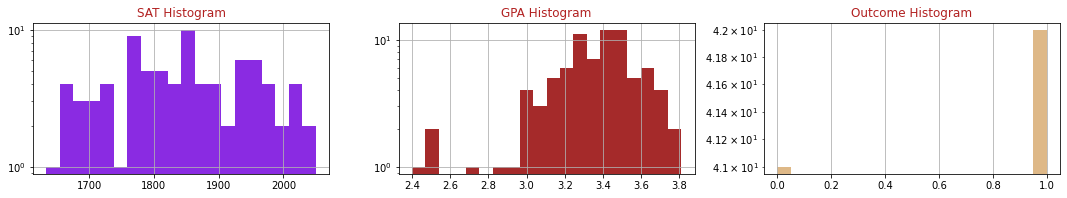

In [20]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

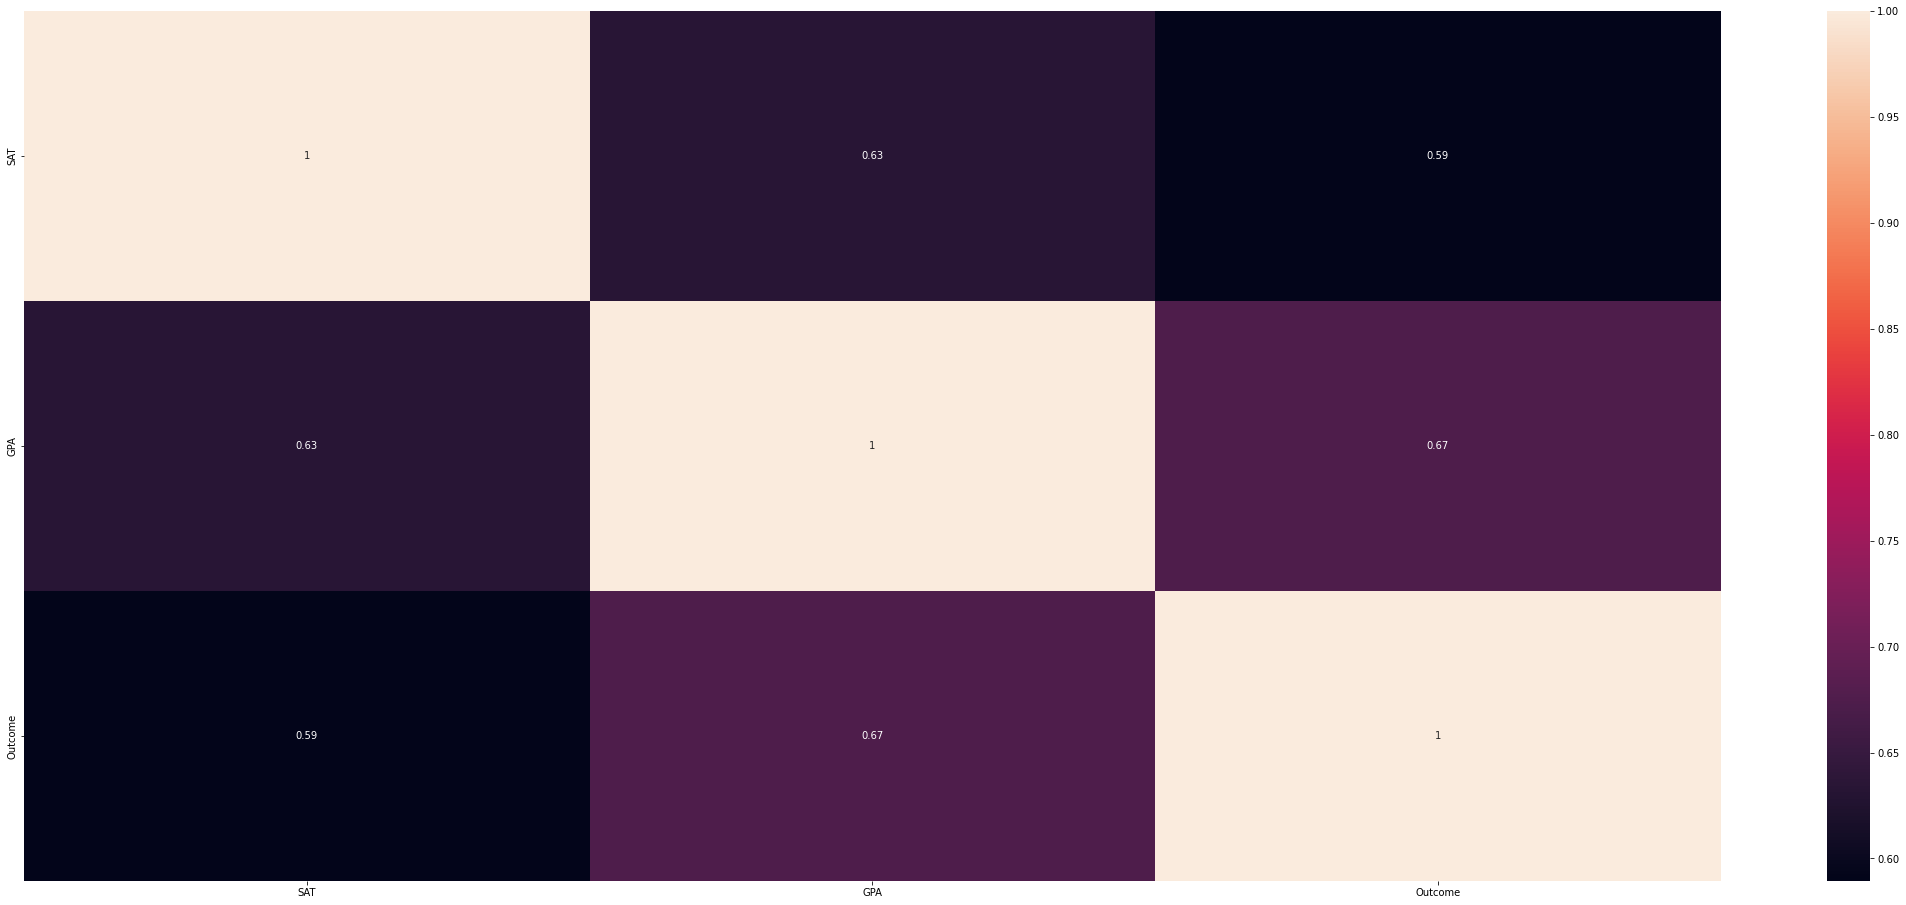

In [21]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

# Building Logistic Regression Model

In [22]:
model = LogisticRegression()

# training the model
model.fit(X_train_scaled, y_train)

# evaluating the model on training set
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

#X_train_scaled = scaler.transform(X_train)

y_pred = model.predict(X_test_scaled)

# evaluating the model on testing set
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Training Set is 83.33333333333334
The Accuracy for Test Set is 94.11764705882352


C:\Users\Ali Rizvi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Classification Report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.90      1.00      0.95         9

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



# Confusion Matrix

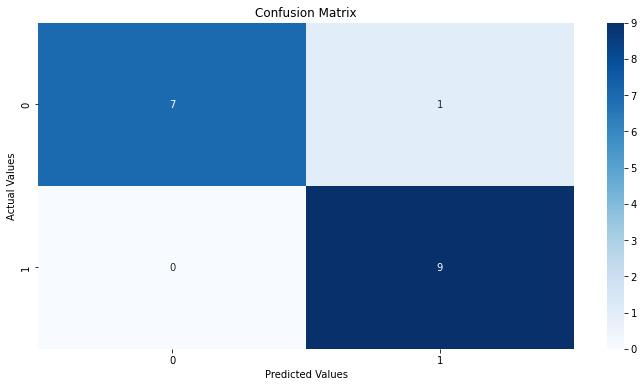

In [25]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('Confusion_Matrix.png')